In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir -p ~/.kaggle


In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download -d mohnishsaiprasad/forest-fire-images

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [6]:
! unzip forest-fire-images.zip

unzip:  cannot find or open forest-fire-images.zip, forest-fire-images.zip.zip or forest-fire-images.zip.ZIP.


## 1. import library 

In [7]:
import glob
import pandas as pd
import numpy as np
import os
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

## 2. Preprocessing

In [8]:
import pathlib
fire_image_path = "Data/Train_Data/Fire"
non_fire_path = "Data/Train_Data/Non_Fire"
fire_image_path = pathlib.Path(fire_image_path)
non_fire_path = pathlib.Path(non_fire_path)

In [9]:
train_data_images = {
    "Fire":list(fire_image_path.glob("*.jpg")),
    "NonFire":list(non_fire_path.glob("*.jpg"))
}
train_labels = {
    "Fire":0,"NonFire":1
}

## 3. Reading images and storing it in an array

In [10]:
X, y = [], []
for label, images in train_data_images.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the image
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            X.append(img)
            y.append(train_labels[label])

In [13]:
import numpy
X_samp = numpy.array(X)
y_samp = numpy.array(y)
X_samp = (X_samp/255)
X_samp[0].shape

IndexError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2)

## 4. Data Argumentation

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model. It is closely related to oversampling in data analysis.
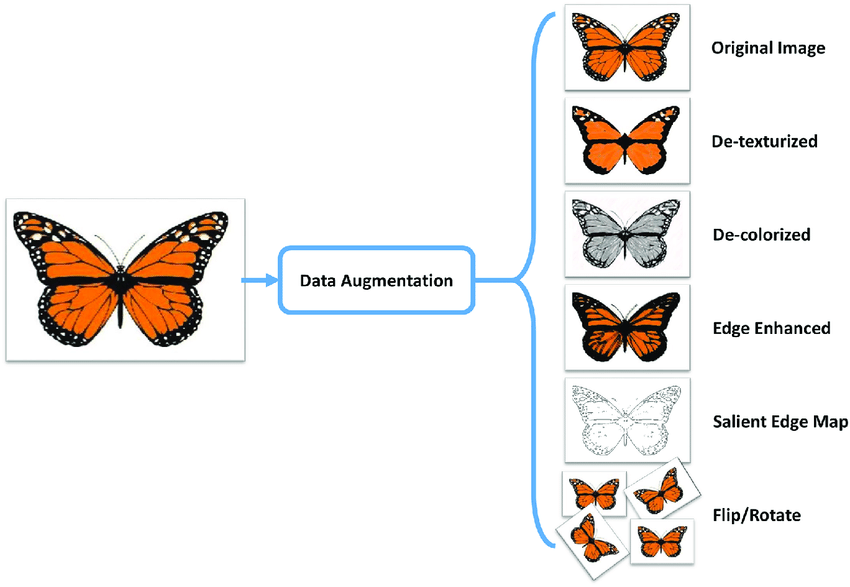



In [ ]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.5)
])

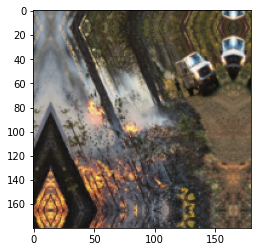

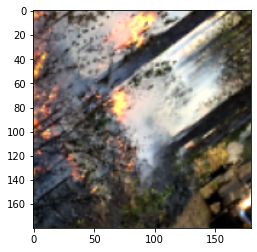

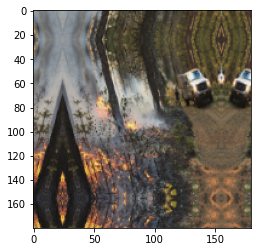

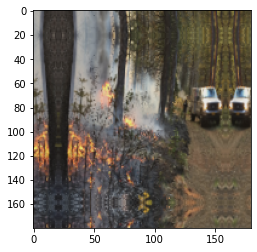

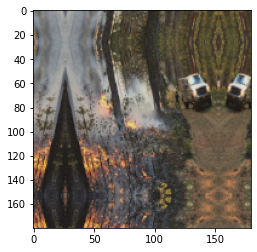

In [ ]:
for i in range(5):
    plt.imshow(data_argumentation(X_train[5]))
    plt.show()

In [ ]:
len(X_train) 

3687

In [ ]:
len(X_test)

922

In [ ]:
len(X_samp)

4609

In [ ]:
len(y_samp)

4609

In [ ]:
len(y_train)

3687

In [ ]:
len(y_test)

922

## 5. Model Building
In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of Artificial Neural Network(ANN), most commonly applied to analyze visual imagery. They are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation equivariant responses known as feature maps Counter-intuitively, most convolutional neural networks are only equivariant, as opposed to invariant, to translation. They have applications in image and video recognition, recommender systems, image classification, image segmentation, medical image analysis, natural language processing, brain-computer interfaces, and financial time series.

# 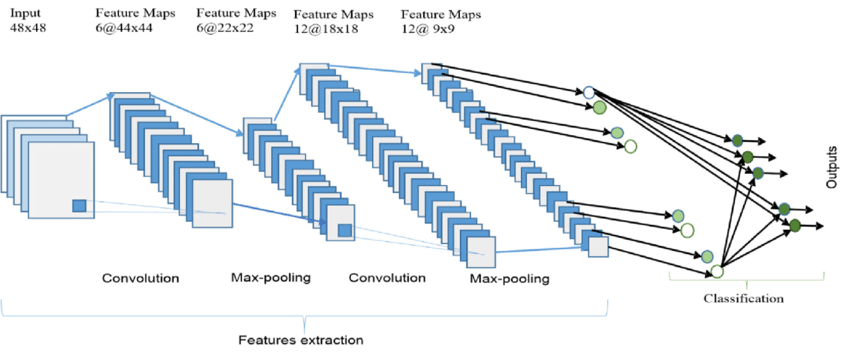

In [ ]:

model = keras.Sequential([
    data_argumentation,
    keras.layers.Conv2D(64, (3,3), padding='same', activation="relu", input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), padding='same', activation="softmax"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), padding='same', activation="softmax"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=150)

Epoch 1/150


116/116 [==============================] - 26s 138ms/step - loss: 0.5867 - accuracy: 0.6816
Epoch 2/150
116/116 [==============================] - 16s 134ms/step - loss: 0.3704 - accuracy: 0.8690
Epoch 3/150
116/116 [==============================] - 16s 137ms/step - loss: 0.3279 - accuracy: 0.8847
Epoch 4/150
116/116 [==============================] - 16s 138ms/step - loss: 0.2995 - accuracy: 0.8969
Epoch 5/150
116/116 [==============================] - 17s 145ms/step - loss: 0.2778 - accuracy: 0.8996
Epoch 6/150
116/116 [==============================] - 16s 141ms/step - loss: 0.2721 - accuracy: 0.9075
Epoch 7/150
116/116 [==============================] - 16s 140ms/step - loss: 0.2615 - accuracy: 0.9075
Epoch 8/150
116/116 [==============================] - 16s 139ms/step - loss: 0.2515 - accuracy: 0.9070
Epoch 9/150
116/116 [==============================] - 16s 142ms/step - loss: 0.2446 - accuracy: 0.9089
Epoch 10/150
116/116 [==============================] - 16s 137ms/step - los

In [ ]:
history.history??

In [ ]:
#losses = pd.DataFrame(model.history.history)
#losses[['accuracy', 'loss']].plot()

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy jihen')
plt.ylabel('accuracy')
plt.xlabel('eposh')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss jihen')
plt.ylabel('loss')
plt.xlabel('eposh')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
## architecture CNN  
model.summary()

In [ ]:
## diagramme de model  
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

## 6. Evaluation

In [ ]:
model.evaluate(X_test, y_test)

## 7. Testing Dataset


In [ ]:
test_fire = "Data/Test_Data/Fire"
test_non_fire = "Data/Test_Data/Non_Fire"
test_fire = pathlib.Path(test_fire)
test_non_fire = pathlib.Path(test_non_fire)

In [ ]:
test = {
    "Fire":list(test_fire.glob("*.jpg")),
    "NonFire":list(test_non_fire.glob("*.jpg"))
}

In [ ]:
test_array = []
for label, images in test.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the test image
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            test_array.append(img)
test_array = numpy.array(test_array)

In [ ]:
test_array = test_array/ 255
pred = model.predict(test_array)

In [ ]:
preds = pred.round(decimals=0).flatten()
results = []
for i in preds:
    if i==0:
        results.append("Fire")
    elif i == 1:
        results.append("Non Fire")

In [ ]:
fire = 0
nonFire = 0
for i in results:
    if i=="Fire":
        fire += 1
    else:
        nonFire += 1
print(fire, "Fire images out of ", 25)
print(nonFire , 'Non fire images out of', 25)

In [ ]:
font1 = {'family':'serif','color':'blue','size':20} # Custom font for my title
for i in range(50):
    plt.imshow(test_array[i])
    plt.title(results[i], fontdict=font1)
    plt.axis('off')
    plt.show()

In [ ]:
model.save('fire_detection_93.h5')